In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_path = './Dataset Medical Waste/'

In [3]:
Waystopcock_1 = cv.imread(img_path+'3Waystopcock/IMG_20210806_145624.jpg') # White
Waystopcock_2 = cv.imread(img_path+'3Waystopcock/IMG_20210806_145925.jpg') # Green
Waystopcock_3 = cv.imread(img_path+'3Waystopcock/IMG_20210806_145835.jpg') # black

In [4]:
#plt.subplot(1,3,1),plt.imshow(Waystopcock_1),plt.title('Waystopcock_1'),plt.xticks([]),plt.yticks([])
#plt.subplot(1,3,2),plt.imshow(Waystopcock_2),plt.title('Waystopcock_2'),plt.xticks([]),plt.yticks([])
#plt.subplot(1,3,3),plt.imshow(Waystopcock_3),plt.title('Waystopcock_3'),plt.xticks([]),plt.yticks([])
#plt.show()

In [5]:
#plt.subplot(1,3,1),plt.hist(Waystopcock_1.ravel(),256,[0,256]),plt.title('Waystopcock_1')#,plt.xticks([]),plt.yticks([])
#plt.subplot(1,3,2),plt.hist(Waystopcock_2.ravel(),256,[0,256]),plt.title('Waystopcock_2')#,plt.xticks([]),plt.yticks([])
#plt.subplot(1,3,3),plt.hist(Waystopcock_3.ravel(),256,[0,256]),plt.title('Waystopcock_3')#,plt.xticks([]),plt.yticks([])
#plt.show()

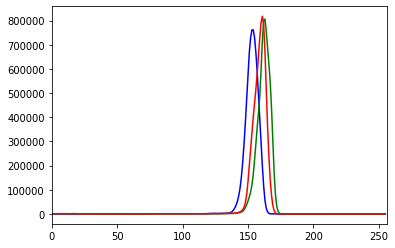

In [6]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([Waystopcock_1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

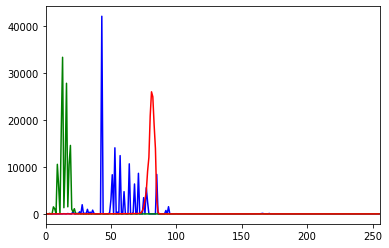

In [7]:
Waystopcock_1_lowct = cv.convertScaleAbs(Waystopcock_1, alpha=.5, beta=0)
Waystopcock_1_lowct = cv.resize(Waystopcock_1_lowct,(Waystopcock_1_lowct.shape[1]//8,Waystopcock_1_lowct.shape[0]//8))
Waystopcock_1_lowct = cv.cvtColor(Waystopcock_1_lowct, cv.COLOR_BGR2HSV_FULL)
Waystopcock_1_lowct_hists = []
for i,col in enumerate(color):
    if(i==0): #H
        histr = cv.calcHist([Waystopcock_1_lowct],[i],None,[360],[0,360])
    elif(i==1): #S
        histr = cv.calcHist([Waystopcock_1_lowct],[i],None,[256],[0,256])
    elif(i==2): #V
        histr = cv.calcHist([Waystopcock_1_lowct],[i],None,[256],[0,256])
    Waystopcock_1_lowct_hists.append(histr)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

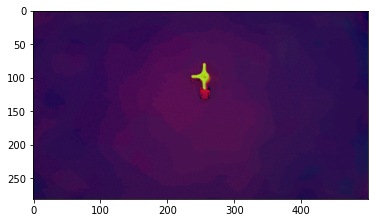

(<matplotlib.image.AxesImage at 0x1c632a2e7c0>, None)

In [8]:
plt.imshow(Waystopcock_1_lowct),plt.show()

In [9]:
Waystopcock_1_lowct_hists_np = np.array(Waystopcock_1_lowct_hists,dtype=object)
#print(Waystopcock_1_lowct_hists_np.shape)
max_h = np.unravel_index(np.argmax(Waystopcock_1_lowct_hists_np[0], axis=None), Waystopcock_1_lowct_hists_np[0].shape)
max_s = np.unravel_index(np.argmax(Waystopcock_1_lowct_hists_np[1], axis=None), Waystopcock_1_lowct_hists_np[1].shape)
max_v = np.unravel_index(np.argmax(Waystopcock_1_lowct_hists_np[2], axis=None), Waystopcock_1_lowct_hists_np[2].shape)
print(f"({max_h},({max_s}),({max_v}))")
print(np.max(Waystopcock_1_lowct[:,:,2]))

((43, 0),((13, 0)),((81, 0)))
90


In [10]:
#print(Waystopcock_1_lowct.shape)
diff_thres_h = np.var(Waystopcock_1_lowct[:,:,0])
diff_thres_s = np.var(Waystopcock_1_lowct[:,:,1])
diff_thres_v = np.var(Waystopcock_1_lowct[:,:,2])
diff_thres_h = int(np.var(Waystopcock_1_lowct[:,:,0])//50)
diff_thres_s = int(np.var(Waystopcock_1_lowct[:,:,1])//45)
diff_thres_v = int(np.var(Waystopcock_1_lowct[:,:,2])//10)
print(f"{diff_thres_h},{diff_thres_s},{diff_thres_v}")
diff_thres_h = 50
diff_thres_s = 40
diff_thres_v = 50

5,2,1


In [11]:
low_H = np.int16(np.clip(max_h[0] - diff_thres_h,0,359)).item()
low_S = np.int16(np.clip(max_s[0] - diff_thres_s,0,255)).item()
low_V = np.int16(np.clip(max_v[0] - diff_thres_v,0,255)).item()
high_H = np.int16(max_h[0] + diff_thres_h).item()
high_S = np.int16(max_s[0] + diff_thres_s).item()
high_V = np.int16(max_v[0] + diff_thres_v).item()

print(f"low_H={low_H} {type(low_H)}")
print(f"low_S={low_S} {type(low_S)}")
print(f"low_V={low_V} {type(low_V)}")
print(f"high_H={high_H} {type(high_H)}")
print(f"high_S={high_S} {type(high_S)}")
print(f"high_V={high_V} {type(high_V)}")

low_H=0 <class 'int'>
low_S=0 <class 'int'>
low_V=31 <class 'int'>
high_H=93 <class 'int'>
high_S=53 <class 'int'>
high_V=131 <class 'int'>


In [12]:
lowerb = (low_H, low_S, low_V)
upperb = (high_H, high_S, high_V)
print(lowerb)
print(upperb)
frame_threshold = cv.inRange(Waystopcock_1_lowct, lowerb, upperb)

(0, 0, 31)
(93, 53, 131)


C:\Users\GORN\AppData\Local\Temp/ipykernel_8572/3886558622.py:1: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("121"),plt.imshow(Waystopcock_1_lowct),plt.subplot("122"),plt.imshow(frame_threshold)


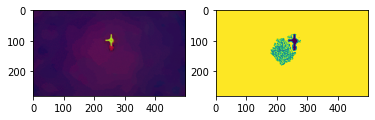

In [13]:
plt.subplot("121"),plt.imshow(Waystopcock_1_lowct),plt.subplot("122"),plt.imshow(frame_threshold)
plt.show()